Autor:  
Manuel Eugenio Morocho Cayamcela, PhD

# **Unsupervised Learning** 
## Agrupamiento de Clientes de un Centro Comercial con KMeans  

### **Introducción:** 

En esta actividad, se presenta el concepto de agrupamiento (clustering) utilizando un ejemplo relacionado con la base de datos `mall_customers.csv`, que presenta datos de clientes de un centro comercial y una variable que representa su comportamiento de compra.

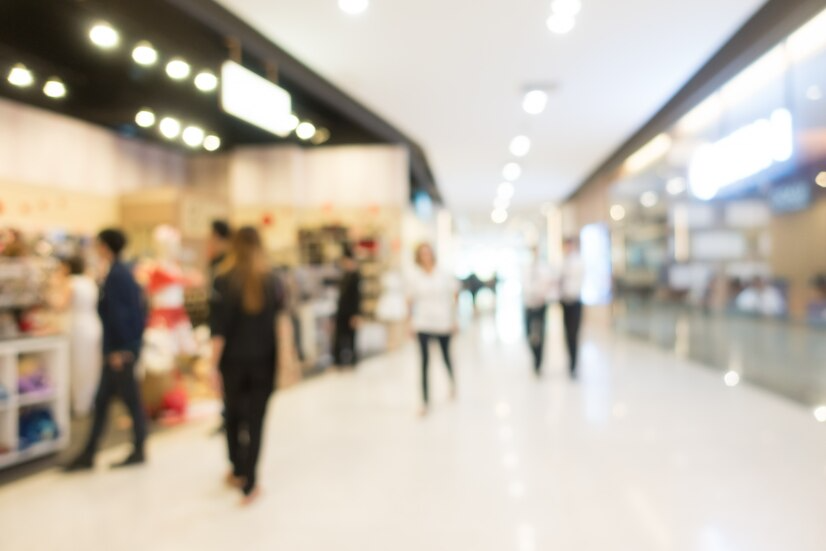

El conjunto de datos `mall_customers.csv` tiene las siguientes variables:

1. `CustomerID`: Un identificador único para cada cliente. Es un número entero que se incrementa en 1 para cada cliente. 

2. `Gender`: El género del cliente. Es una variable categórica con dos posibles valores: 'Male' y 'Female'.

3. `Age`: La edad del cliente. Es una variable numérica.

4. `Annual Income (k$)`: El ingreso anual del cliente, en miles de dólares. Es una variable numérica.

5. `Spending Score (1-100)`: La puntuación de gasto del cliente, en una escala de 1 a 100. Es una variable numérica. Esta puntuación es un indicador de cuánto gasta el cliente o de su comportamiento de compra.

El "spending score" es una medida que representa cuánto dinero gasta un cliente en un establecimiento en particular en un período de tiempo determinado. Esta métrica es crucial para comprender el comportamiento de compra de los clientes y segmentarlos en grupos que comparten características similares. Pero, ¿cómo se calcula este puntaje y de dónde se obtiene en una empresa real?

El "spending score" se deriva de una combinación de diferentes factores, como la frecuencia de las visitas al establecimiento, el valor promedio de la compra, la cantidad total gastada en un período de tiempo específico, entre otros. A menudo, las empresas utilizan sistemas de seguimiento de clientes, como programas de lealtad, tarjetas de fidelidad o sistemas de punto de venta (POS), para recopilar datos sobre las compras de los clientes. Estos sistemas registran cada transacción realizada por un cliente, incluido el monto gastado, los artículos comprados y la frecuencia de las visitas.

Con esta información, las empresas pueden calcular el "spending score" utilizando diversos métodos, como asignar puntos a cada compra en función del valor o la frecuencia, o utilizando algoritmos más complejos que tienen en cuenta múltiples variables. El objetivo es crear una métrica que refleje de manera precisa y significativa el comportamiento de compra de cada cliente.

En el mundo real, el "spending score" se utiliza en una variedad de industrias, incluyendo minoristas, restaurantes, hoteles, servicios financieros y más. Las empresas lo utilizan para comprender mejor a sus clientes, identificar patrones de compra, diseñar estrategias de marketing dirigidas y mejorar la experiencia del cliente.

### **Contenido:**

#### Importamos los paquetes necesarios

In [4]:
# Instalamos los paquetes necesarios
%pip install scikit-learn
%pip install pandas
%pip install matplotlib
%pip install seaborn
%pip install ipywidgets
%matplotlib inline

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
# Importamos los paquetes necesarios
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

#### Cargamos la base de datos

In [6]:
# Cargamos la base de datos 'mall_customers.csv'
clientes = pd.read_csv('mall_customers.csv')

#### Visualizamos las primeras 10 filas de la base de datos cargada

In [7]:
# Visualizamos los primeros registros
clientes.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [8]:
# Visualizamos la información de la base de datos
clientes.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


array([[<Axes: title={'center': 'CustomerID'}>,
        <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'Annual Income (k$)'}>,
        <Axes: title={'center': 'Spending Score (1-100)'}>]], dtype=object)

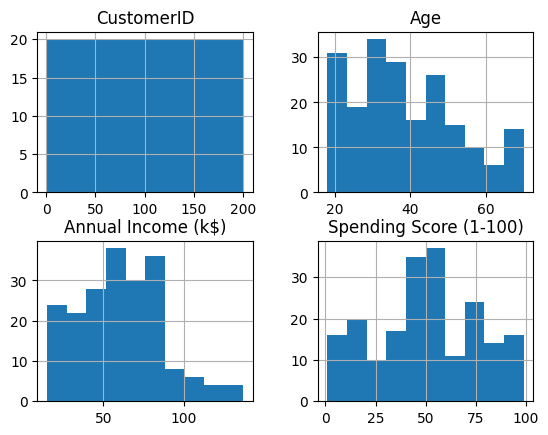

In [9]:
# Visualizamos el histograma de las variables
clientes.hist()

#### Eliminamos columnas que no aportan información útil para el análisis

La columna `CustomerID` es un identificador único para cada cliente. En la mayoría de los casos, este tipo de identificadores no aporta información útil para el análisis de los datos o para la construcción de modelos de data mining, ya que no tiene relación con las otras variables. Por lo tanto, es común eliminar esta columna antes de realizar el análisis.



El método `drop` de pandas elimina la columna especificada (`'CustomerID'`) del DataFrame. El argumento `axis=1` indica que queremos eliminar una columna (en lugar de una fila). El DataFrame resultante se guarda de nuevo en la variable `clientes`.

In [10]:
# Eliminamos la columna 'CustomerID'
clientes = clientes.drop('CustomerID', axis=1)
clientes.head(10)

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
5,Female,22,17,76
6,Female,35,18,6
7,Female,23,18,94
8,Male,64,19,3
9,Female,30,19,72


#### Codificamos la columna categórica 'Gender'

Utilizamos el método `replace` de pandas para reemplazar los valores en la columna 'Gender' del DataFrame 'clientes'.

- `clientes['Gender']`: Selecciona la columna 'Gender' del DataFrame 'clientes'.

- `replace({'Female': 0, 'Male': 1})`: Este método reemplaza los valores en la columna según el mapeo proporcionado. En este caso, está reemplazando 'Female' con 0 y 'Male' con 1. Esto se conoce como codificación de etiquetas o "label encoding".

El propósito de este código es convertir la variable categórica 'Gender' en una variable numérica, lo que nos será útil para calcular la correlación de variables. 

In [11]:
# Codificamos la variable 'Gender'
clientes['Gender'] = clientes['Gender'].replace({'Female': 0, 'Male': 1})
clientes.head(10)

C:\Users\pcstu\AppData\Local\Temp\ipykernel_20940\1306256639.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  clientes['Gender'] = clientes['Gender'].replace({'Female': 0, 'Male': 1})


,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
5,0,22,17,76
6,0,35,18,6
7,0,23,18,94
8,1,64,19,3
9,0,30,19,72


#### Usamos `ydata_profiling` para perfilar los datos

La herramienta `ydata_profiling` es muy poderosa para el análisis exploratorio de datos. Esta biblioteca de Python genera perfiles de datos detallados a partir de un DataFrame de pandas, proporcionando una visión rápida y completa de la estructura, relaciones y distribuciones de los datos.

Con `ydata_profiling`, puedes obtener un informe completo de tu conjunto de datos con solo unas pocas líneas de código. El informe incluye estadísticas descriptivas, distribuciones de variables, correlaciones, valores faltantes, entre otros aspectos. Esto puede ser extremadamente útil al inicio de cualquier proyecto de análisis de datos o data mining, ya que te permite entender tus datos antes de proceder con el preprocesamiento o modelado.

Ten en cuenta que `ydata_profiling` es una herramienta de análisis de datos y, como tal, no reemplaza la necesidad de un análisis cuidadoso y una comprensión profunda de tus datos. Siempre es importante verificar y entender los resultados que proporciona.

In [17]:
# Instalamos la librería ydata_profiling


# Importamos ProfileReport de la librería ydata_profiling
from ydata_profiling import ProfileReport

ModuleNotFoundError: No module named 'ydata_profiling'

- `clientes`: Es el DataFrame de pandas que vamos a perfilar.

- `title='Reporte de Perfilado de Datos de Clientes'`: Este argumento establece el título del informe.

- `explorative=True`: Este argumento indica que el informe debe ser exploratorio. Esto significa que el informe incluirá más información y análisis que un informe de perfilado estándar.

El informe de perfilado de datos proporciona una visión general rápida de tu conjunto de datos, incluyendo el tipo de datos, los valores únicos, los valores faltantes, las estadísticas descriptivas, las correlaciones y la distribución de las variables.

Para visualizar el informe, simplemente necesitas llamar al objeto `perfil_datos` en una celda de Jupyter Notebook.

In [18]:
# Generamos el reporte de perfilado de datos
perfil_datos = ProfileReport(clientes, title='Reporte de Perfilado de Datos de Clientes', explorative=True)

NameError: name 'ProfileReport' is not defined

In [ ]:
# Visualizamos el reporte de perfilado de datos
perfil_datos.to_widgets()

In [ ]:
perfil_datos.to_file('reporte_perfilado_clientes.html')

#### Graficamos la distribución de las variables

La distribución de las variables en un conjunto de datos puede proporcionar información valiosa sobre las características de los datos. Aquí hay algunas cosas que podrías observar:

**Tendencia central**: La media y la mediana pueden dar una idea de dónde se centran los datos.

**Dispersión**: La desviación estándar y el rango intercuartil pueden indicar cuánto se dispersan los datos alrededor de la media.

**Asimetría**: Si los datos están sesgados a la izquierda o a la derecha, puede indicar que hay valores atípicos o que los datos no se distribuyen de manera uniforme.

**Valores atípicos**: Los valores que están significativamente alejados del resto de los datos pueden indicar errores de medición, o pueden representar variaciones naturales en los datos.

**Distribución multimodal**: Si los datos tienen más de un pico, puede indicar que hay subgrupos dentro de los datos.

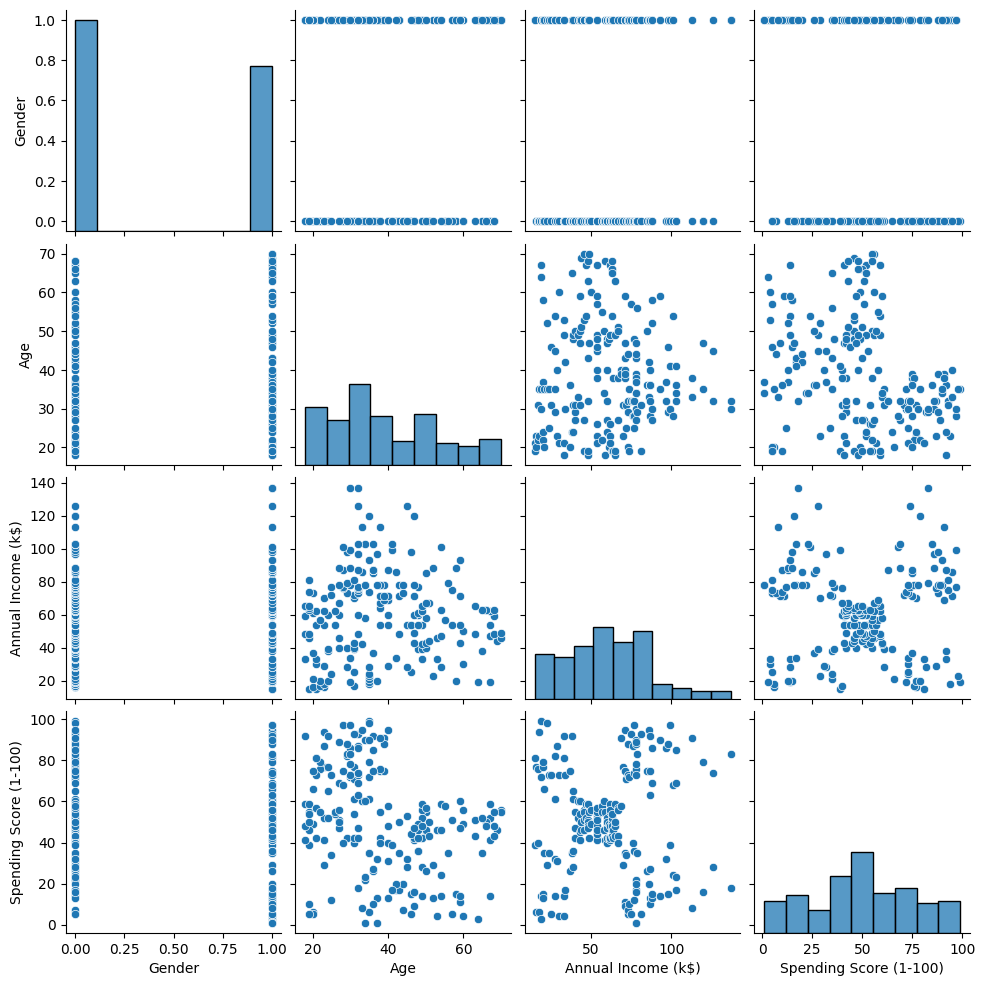

In [19]:
# Graficamos la distribución de todas las variables 
sns.pairplot(clientes)

#### Creamos un nuevo DataFrame aislando las variables 'Annual Income (k$)' y 'Spending Score (1-100)'

El gráfico de dispersión entre 'Annual Income (k$)' y 'Spending Score (1-100)' revela agrupaciones visibles de datos, lo que sugiere que hay grupos de clientes con comportamientos de gasto similares en relación con sus ingresos anuales.

Creamos un nuevo DataFrame que contenga solo estas dos variables para analizar más a fondo estas agrupaciones y aplicar técnicas de clustering para identificar y definir estos grupos de manera más formal.

Esto puede proporcionar información valiosa para la estrategia de marketing, ya que permite segmentar a los clientes en función de su comportamiento de gasto en relación con sus ingresos, lo que a su vez puede informar decisiones sobre la orientación de las ofertas y promociones, la personalización de la comunicación con los clientes, y más.

In [20]:
# Creamos un DataFrame solamente con las columnas 'Age' y 'Annual Income(k$)'
income_spending = clientes[['Annual Income (k$)', 'Spending Score (1-100)']]
income_spending.head(10)

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
5,17,76
6,18,6
7,18,94
8,19,3
9,19,72


#### Graficamos la distribución de las variables 'Age' y 'Annual Income (k$)'

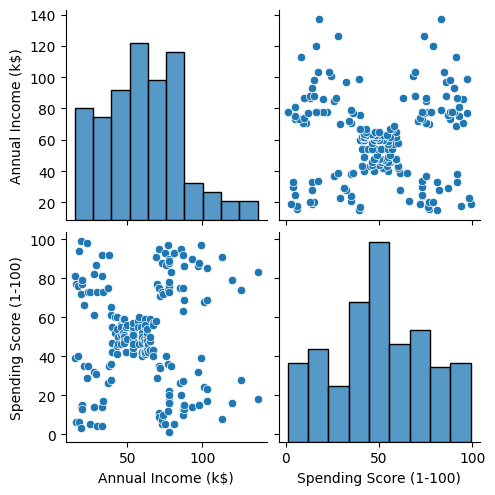

In [21]:
# Graficamos la distribución de income_spending
sns.pairplot(income_spending)

#### Agrupamos el DataFrame 'income_spending' usando el algoritmo KMeans

Usamos un agrupamiento `KMeans` en el DataFrame `income_spending` para encontrar 2 clusters utilizando el algoritmo KMeans, y luego añadimos las etiquetas de los clusters a los datos.

- `modelo_kmeans = KMeans(n_clusters=2)`: Esta línea crea una instancia del modelo KMeans con 2 clusters. El número de clusters es un parámetro que se debe especificar.

- `modelo_kmeans.fit(income_spending)`: Esta línea ajusta el modelo a los datos de `income_spending`. El modelo KMeans intentará encontrar los centros de los clusters que minimizan la varianza dentro de cada cluster.

- `income_spending['Cluster'] = modelo_kmeans.labels_`: Después de ajustar el modelo, puedes obtener las etiquetas de los clusters para cada punto de datos utilizando el atributo `labels_` del modelo. Esta línea añade las etiquetas de los clusters como una nueva columna en el DataFrame `income_spending`.

- `income_spending.head(10)`: Esta línea muestra las primeras 10 filas del DataFrame `income_spending`, que ahora incluye la columna 'Cluster'.

In [22]:
# Instanciamos el modelo KMeans
modelo_kmeans = KMeans(n_clusters=2, random_state=75)

# Ajustamos el modelo a los datos
modelo_kmeans.fit(income_spending)

,n_clusters,2
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,75
,copy_x,True
,algorithm,'lloyd'


In [23]:
# Duplicamos la base de datos 'income_spending' para no modificar la original y agregar los clusters
income_spending_cluster = income_spending.copy()

# Obtenemos las etiquetas de los clusters asignados a cada cliente
income_spending_cluster['Cluster'] = modelo_kmeans.labels_

# Visualizamos los primeros registros de 'income_spending_cluster'
income_spending_cluster.head(10)

,Annual Income (k$),Spending Score (1-100),Cluster
0,15,39,1
1,15,81,1
2,16,6,1
3,16,77,1
4,17,40,1
5,17,76,1
6,18,6,1
7,18,94,1
8,19,3,1
9,19,72,1


Creamos un gráfico de pares de las variables de `income_spending`, coloreando los puntos de acuerdo con los clusters identificados por el algoritmo KMeans. Esto nos ayuda a visualizar cómo se distribuyen los clusters en el espacio de las variables.

- `sns.pairplot(income_spending)`: Esta función crea un gráfico de pares de todas las variables en el DataFrame `income_spending`. Un gráfico de pares muestra la relación entre cada par de variables en un conjunto de datos.

- `hue='Cluster'`: Este argumento indica que los puntos en el gráfico deben ser coloreados de acuerdo con la columna 'Cluster'. Esto permite visualizar cómo se distribuyen los clusters en cada par de variables.

- `palette='viridis'`: Este argumento establece la paleta de colores a usar para los diferentes clusters. 'viridis' es una paleta de colores perceptualmente uniforme que es fácil de interpretar.

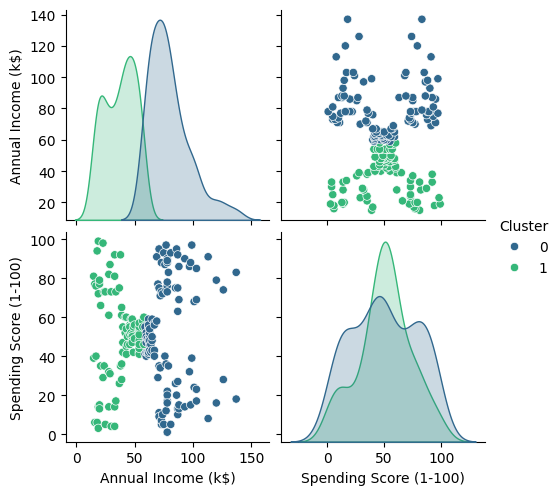

In [24]:
# Visualizamos los clusters generados por el modelo KMeans
sns.pairplot(income_spending_cluster, hue='Cluster', palette='viridis')

In [25]:
# Encontramos la inercia del modelo KMeans
inercia = modelo_kmeans.inertia_
inercia

181363.59595959593

Finalmente, podemos usar el modelo KMeans que se ajustó anteriormente para predecir a qué cluster pertenece un nuevo cliente basándonos en sus características.

- `cliente_nuevo = [ , ]`: Esta línea crea una lista que representa los datos de un nuevo cliente. Los valores en la lista corresponden a las características del cliente (ingresos anuales, puntuación de gasto).

- `cluster_nuevo = modelo_kmeans.predict([cliente_nuevo])`: Esta línea utiliza el método `predict` del modelo KMeans para predecir a qué cluster pertenece el nuevo cliente. El método `predict` toma una lista de listas como entrada, donde cada lista interna representa los datos de un cliente. En este caso, solo hay un cliente, por lo que la entrada es `[cliente_nuevo]`.

- `print('El nuevo cliente pertenece al cluster:', cluster_nuevo)`: Esta línea imprime el cluster al que pertenece el nuevo cliente. El método `predict` devuelve una lista de etiquetas de cluster, una para cada cliente en la entrada. En este caso, solo hay un cliente, por lo que `cluster_nuevo` es una lista con un solo elemento.

### Trabajo individual

Vemos que posiblemente 2 no sea el valor óptimo de $k$ que buscamos. Intentemos encontrar el mejor valor de $k$ utilizando el método del codo. Este método implica ejecutar el algoritmo de agrupamiento KMeans para un rango de valores de $k$ y luego trazar el número de clusters contra la suma de las distancias al cuadrado dentro de cada cluster (inercia). 

> Inertia is calculated by measuring the distance between a datapoint and its centroid, squaring the distance and summing those squares for each data point in the cluster.

El "codo" en esta trama, es decir, el punto de inflexión donde la tasa de disminución (ángulo) se vuelve significativamente menor, puede indicar un buen valor de $k$.

Con los nuevos grupos de clientes, ¿en cuál se enfocarían? y ¿qué estrategia(s) de negocio accionable podemos recomendar?

Finalmente, ¿en qué grupo ubicaríamos a un nuevo cliente con un annual income (k$) de 110, y spending score de 21?

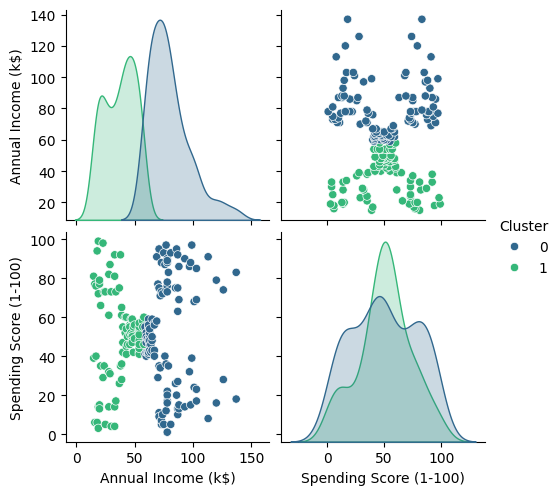

Inercia del modelo con 2 clusters: 181363.59595959593


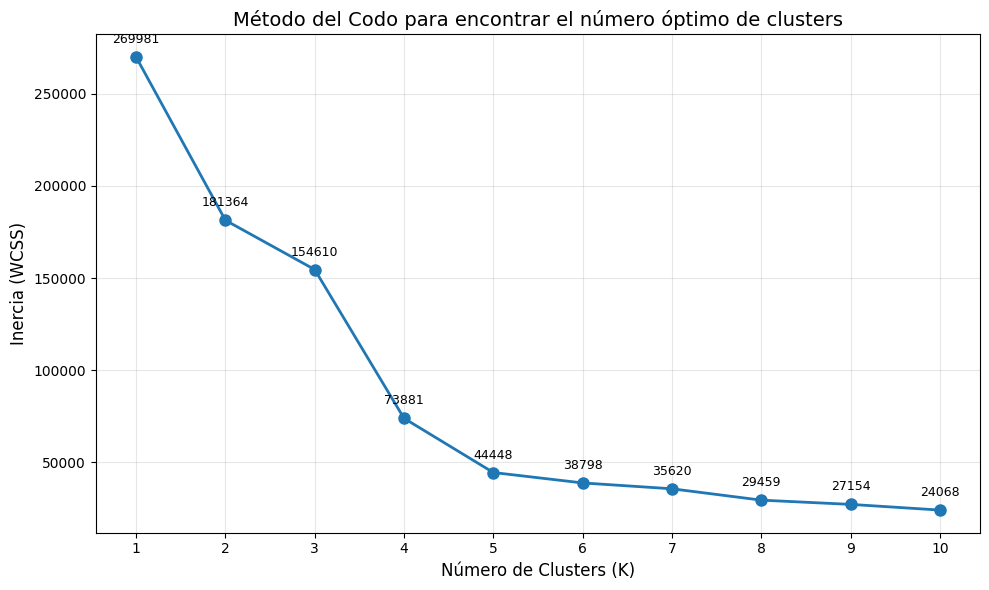

In [ ]:
modelo_kmeans = KMeans(n_clusters=2, random_state=75)

modelo_kmeans.fit(income_spending)

income_spending_cluster = income_spending.copy()


income_spending_cluster['Cluster'] = modelo_kmeans.labels_


sns.pairplot(income_spending_cluster, hue='Cluster', palette='viridis')
plt.show()


inercia = modelo_kmeans.inertia_
print(f"Inercia del modelo con 2 clusters: {inercia}")

import matplotlib.pyplot as plt


inercias = []

k_values = range(1, 11)


for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=75)
    kmeans.fit(income_spending)
    inercias.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(k_values, inercias, marker='o', linewidth=2, markersize=8)
plt.title('Método del Codo para encontrar el número óptimo de clusters', fontsize=14)
plt.xlabel('Número de Clusters (K)', fontsize=12)
plt.ylabel('Inercia (WCSS)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.xticks(k_values)

for i, (k, inercia) in enumerate(zip(k_values, inercias)):
    plt.annotate(f'{inercia:.0f}', (k, inercia), textcoords="offset points", 
                xytext=(0,10), ha='center', fontsize=9)

plt.tight_layout()
plt.show()


diferencias = []
for i in range(1, len(inercias)):
    diferencia = inercias[i-1] - inercias[i]
    diferencias.append(diferencia)
    


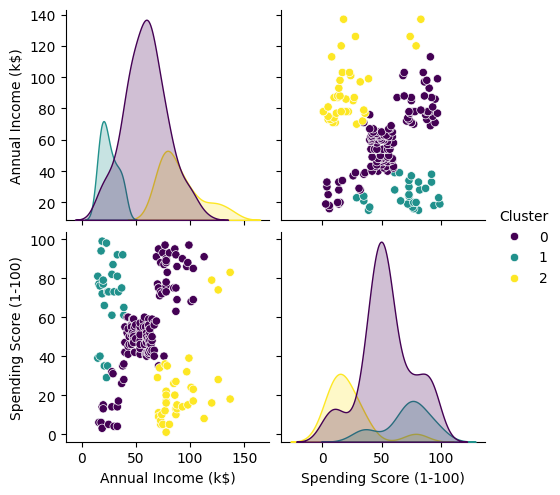

In [31]:
# Instanciamos el modelo KMeans
modelo_kmeans = KMeans(n_clusters=3, random_state=75)

# Ajustamos el modelo a los datos
modelo_kmeans.fit(income_spending)  # Duplicamos la base de datos 'income_spending' para no modificar la original y agregar los clusters
income_spending_cluster = income_spending.copy()

# Obtenemos las etiquetas de los clusters asignados a cada cliente
income_spending_cluster['Cluster'] = modelo_kmeans.labels_

# Visualizamos los primeros registros de 'income_spending_cluster'
income_spending_cluster.head(10)
sns.pairplot(income_spending_cluster, hue='Cluster', palette='viridis')

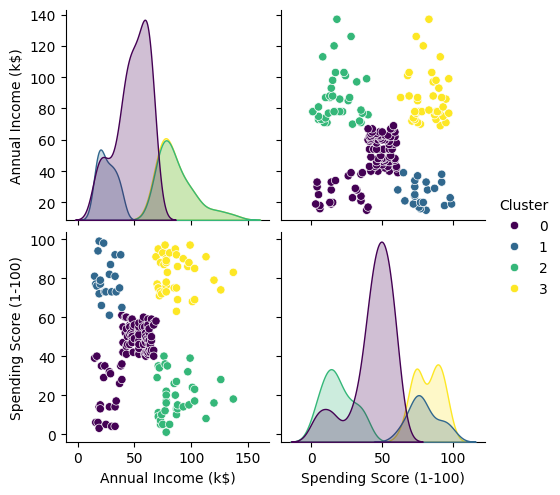

In [32]:
# Instanciamos el modelo KMeans
modelo_kmeans = KMeans(n_clusters=4, random_state=75)

# Ajustamos el modelo a los datos
modelo_kmeans.fit(income_spending)  # Duplicamos la base de datos 'income_spending' para no modificar la original y agregar los clusters
income_spending_cluster = income_spending.copy()

# Obtenemos las etiquetas de los clusters asignados a cada cliente
income_spending_cluster['Cluster'] = modelo_kmeans.labels_

# Visualizamos los primeros registros de 'income_spending_cluster'
income_spending_cluster.head(10)
sns.pairplot(income_spending_cluster, hue='Cluster', palette='viridis')

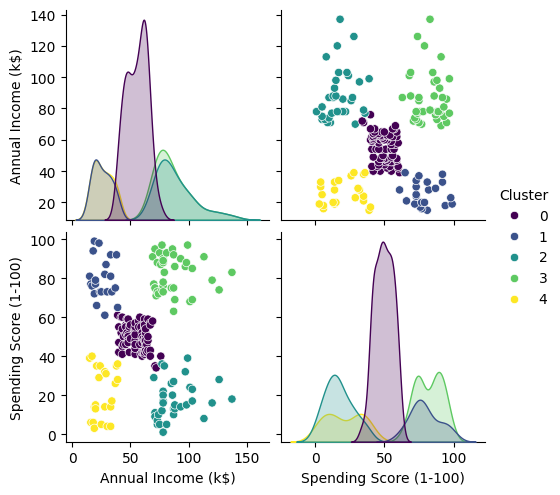

In [34]:
# Instanciamos el modelo KMeans
modelo_kmeans = KMeans(n_clusters=5, random_state=75)

# Ajustamos el modelo a los datos
modelo_kmeans.fit(income_spending)  # Duplicamos la base de datos 'income_spending' para no modificar la original y agregar los clusters
income_spending_cluster = income_spending.copy()

# Obtenemos las etiquetas de los clusters asignados a cada cliente
income_spending_cluster['Cluster'] = modelo_kmeans.labels_

# Visualizamos los primeros registros de 'income_spending_cluster'
income_spending_cluster.head(10)
sns.pairplot(income_spending_cluster, hue='Cluster', palette='viridis')

Con los nuevos grupos de clientes, ¿en cuál se enfocarían? y ¿qué estrategia(s) de negocio accionable podemos recomendar?

Finalmente, ¿en qué grupo ubicaríamos a un nuevo cliente con un annual income (k$) de 110, y spending score de 21?

In [46]:
# Filtramos el DataFrame para obtener solo los registros del Cluster 4
cluster_4_df = income_spending_cluster[income_spending_cluster['Cluster'] == 2]

# Mostramos las primeras filas del cluster 4
cluster_4_df.head(10)


,Annual Income (k$),Spending Score (1-100),Cluster
124,70,29,2
128,71,11,2
130,71,9,2
134,73,5,2
136,73,7,2
138,74,10,2
140,75,5,2
144,77,12,2
146,77,36,2
148,78,22,2


In [47]:

nuevo_cliente = [[110, 21]]


grupo_nuevo_cliente = modelo_kmeans.predict(nuevo_cliente)

# resultado
print(f"El nuevo cliente pertenece al cluster: {grupo_nuevo_cliente[0]}")


El nuevo cliente pertenece al cluster: 2


c:\Users\pcstu\OneDrive\Documentos\MIA\Semana 2\ia2-venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


Con los nuevos grupos de clientes, ¿en cuál se enfocarían? y ¿qué estrategia(s) de negocio accionable podemos recomendar?
Nos enfocariamos en las Personas del Cluster numero 2 ya que son los que menos spending score tienen y tratariamos de analizar que caracterisitcas tienen estas y tratar de adaptar nuestro mercado a estas caracteristicas


Finalmente, ¿en qué grupo ubicaríamos a un nuevo cliente con un annual income (k$) de 110, y spending score de 21?

El nuevo Cliente pertenece al cluster 2